# Домашнее задание 3 - Проверка статистических гипотез и параметрические критерии

**ВАЖНО: Обязательно для каждой задачи строим график и показываем куда попадает наше значение, если в задаче нужно проверить статистическую гипотезу**
\
**При отсутствии графиков возможна полная потеря баллов за задание**

### Задача 1 (1 балл)

Пусть X1,X2,…,Xn​ — независимые и одинаково распределенные случайные величины из нормального распределения с неизвестным средним μ и известной дисперсией σ^2=25. Из выборки объема n=64 получено выборочное среднее =102.
\
Проверьте гипотезу H0:μ=100 против альтернативы H1:μ>100 на уровне значимости α=0.01.
\
Вычислите p-значение этого теста.

Рассчитанная Z-статистика больше, чем критическое значение для данного уровня значимости. Отвергаем нулевую гипотезу.
P-значение (достигаемый уровень значимости) равен: 0.00069


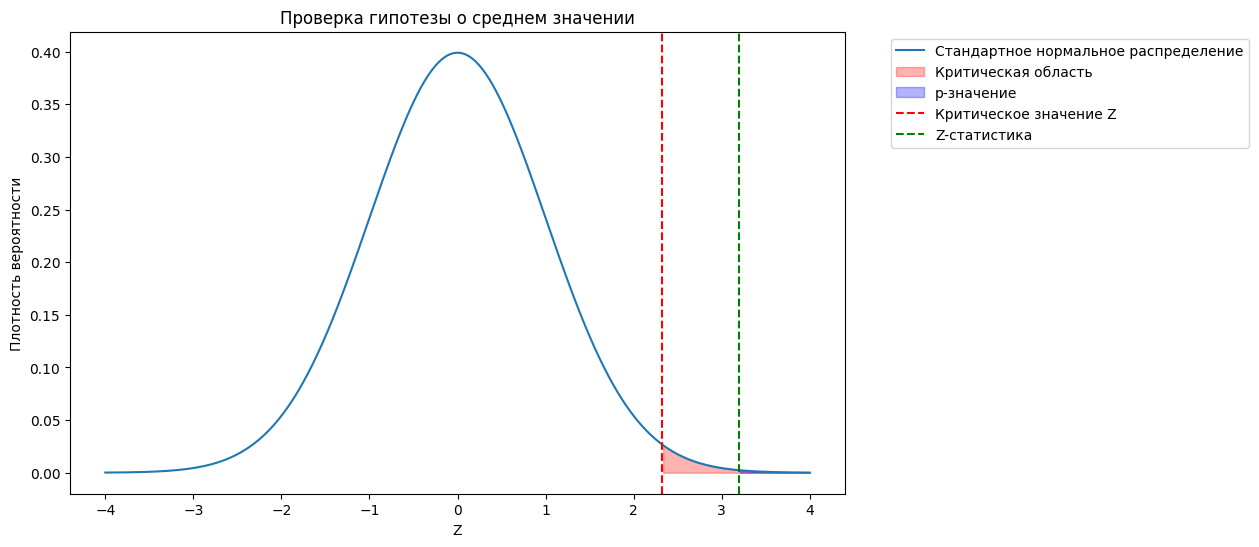

In [ ]:
#h0: mu = 100
#h1: mu > 100
# z-статистика, т.к. имеется дисперсия генеральной выборки

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

norm_distr = stats.norm(loc=0, scale=1)

variation = 25
n = 64
sample_mean = 102
alpha = 0.01
mu = 100

# Такое значение, если мы возьмем больше, то отвергаем нулевую гипотезу (критическое значение для alpha)
z = norm_distr.ppf(1 - alpha)

# ~ N(0, 1)
z_stat = (sample_mean - mu)/np.sqrt(variation/n)

if (z_stat > z):
  print("Рассчитанная Z-статистика больше, чем критическое значение для данного уровня значимости. Отвергаем нулевую гипотезу.")

p_value = norm_distr.sf(z_stat)

print("P-значение (достигаемый уровень значимости) равен:", round(p_value, 5))


x = np.linspace(-4, 4, 1000)
y = norm_distr.pdf(x)

plt.plot(x, y, label='Стандартное нормальное распределение')
plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.3, label='Критическая область')
plt.fill_between(x, y, where=(x >= z_stat), color='blue', alpha=0.3, label='p-значение')
plt.axvline(z, color='red', linestyle='--', label='Критическое значение Z')
plt.axvline(z_stat, color='green', linestyle='--', label='Z-статистика')
plt.title('Проверка гипотезы о среднем значении')
plt.xlabel('Z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(10, 6)

plt.show()


### Задача 2 (1 балл)

Даны три независимые выборки. Первая выборка объемом 35 наблюдений имеет выборочное среднее 10.2 и выборочную дисперсию 2.5. Вторая выборка объемом 30 наблюдений имеет выборочное среднее 9.8 и выборочную дисперсию 2.8. Третья выборка объемом 40 наблюдений имеет выборочное среднее 10.5 и выборочную дисперсию 3.0.

Проверьте гипотезу о том, что средние всех трех выборок равны, на уровне значимости 0.05.
Оцените статистическую значимость результатов и постройте доверительные интервалы c графиками для каждого из средних.

**Использовать попарное сравнение для получения результата**

In [ ]:
alpha = 0.05
z = norm_distr.ppf(1 - alpha/2)

n_1 = 35
sample_mean_1 = 10.2
sample_var_1 = 2.5

n_2 = 30
sample_mean_2 = 9.8
sample_var_2 = 2.8

n_3 = 40
sample_mean_3 = 10.5
sample_var_3 = 3.0

Сравнение средних первой и второй выборок

In [ ]:
var_1_2 = ((n_1 - 1)*sample_var_1 + (n_2 - 1)*sample_var_2)/(n_1 + n_2 - 2)
se = np.sqrt(var_1_2*(1/n_1 + 1/n_2))

t = abs(sample_mean_1 - sample_mean_2)/se
t_critical = stats.t.ppf(1 - alpha/2, n_1 + n_2 - 2)
p_value = norm_distr.sf(t)

if (t > t_critical):
  print('Гипотеза о том, что средние выборок равны, отвергается')
else:
  print('Гипотеза о том, что средние выборок равны, НЕ отвергается')

Гипотеза о том, что средние выборок равны, НЕ отвергается


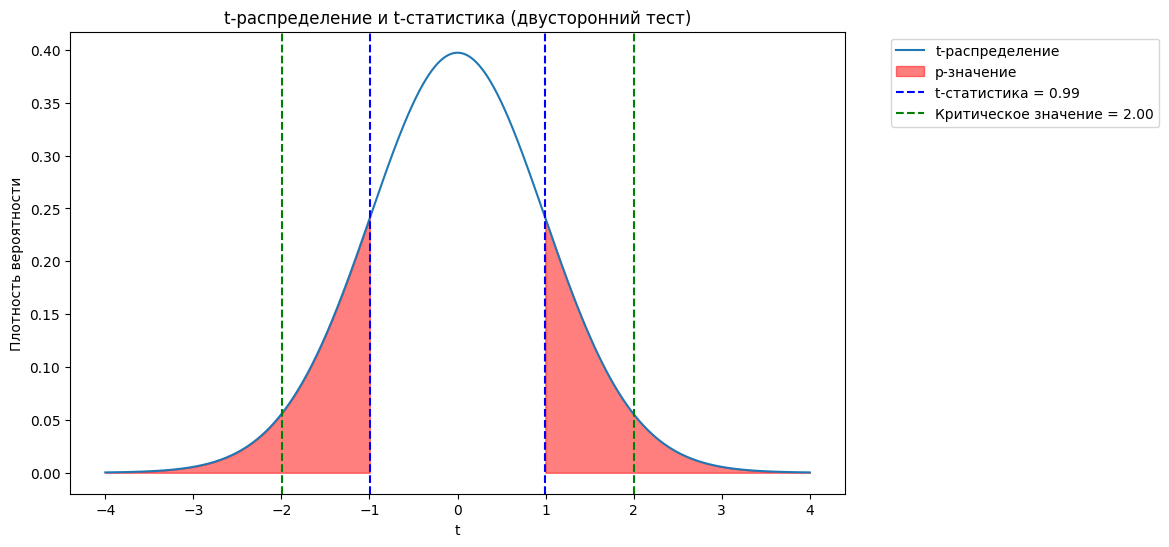

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(t_values, n_1 + n_2 - 2)

t_critical = stats.t.ppf(1 - alpha/2, n_1 + n_2 - 2)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label='p-значение')
plt.fill_between(t_values, pdf, where=(t_values <= -t), color='red', alpha=0.5)

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')
plt.axvline(-t, color='blue', linestyle='--')


plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.axvline(-t_critical, color='green', linestyle='--')

plt.legend()
plt.title('t-распределение и t-статистика (двусторонний тест)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(10, 6)

plt.show()


Сравнение средних первой и третьей выборок

In [ ]:
var_1_3 = ((n_1 - 1)*sample_var_1 + (n_3 - 1)*sample_var_3)/(n_1 + n_3 - 2)
se = np.sqrt(var_1_3*(1/n_1 + 1/n_3))

t = abs(sample_mean_1 - sample_mean_3)/se
t_critical = stats.t.ppf(1 - alpha/2, n_1 + n_3 - 2)

if (t > t_critical):
  print('Гипотеза о том, что средние выборок равны, отвергается')
else:
  print('Гипотеза о том, что средние выборок равны, НЕ отвергается')

Гипотеза о том, что средние выборок равны, НЕ отвергается


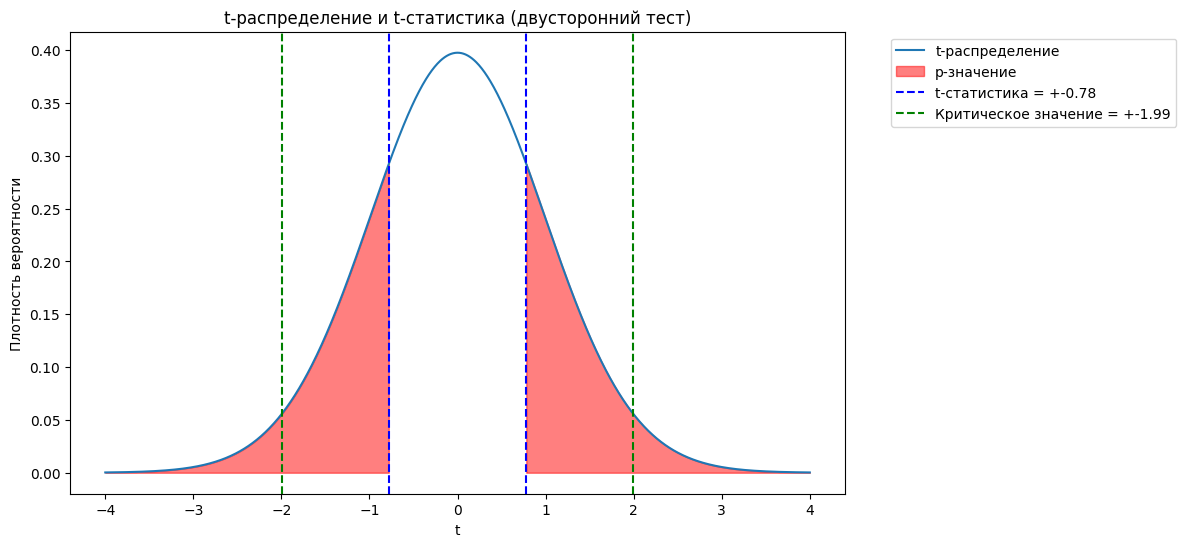

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(t_values, n_1 + n_3 - 2)

t_critical = stats.t.ppf(1 - alpha/2, n_1 + n_3 - 2)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label='p-значение')
plt.fill_between(t_values, pdf, where=(t_values <= -t), color='red', alpha=0.5)

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = +-{t:.2f}')
plt.axvline(-t, color='blue', linestyle='--')


plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = +-{t_critical:.2f}')
plt.axvline(-t_critical, color='green', linestyle='--')

plt.legend()
plt.title('t-распределение и t-статистика (двусторонний тест)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(10, 6)

plt.show()

In [ ]:
var_2_3 = ((n_2 - 1)*sample_var_2 + (n_3 - 1)*sample_var_3)/(n_2 + n_3 - 2)
se = np.sqrt(var_2_3*(1/n_2 + 1/n_3))

t = abs(sample_mean_2 - sample_mean_3)/se
t_critical = stats.t.ppf(1 - alpha/2, n_1 + n_3 - 2)

if (t > t_critical):
  print('Гипотеза о том, что средние выборок равны, отвергается')
else:
  print('Гипотеза о том, что средние выборок равны, НЕ отвергается')

Гипотеза о том, что средние выборок равны, НЕ отвергается


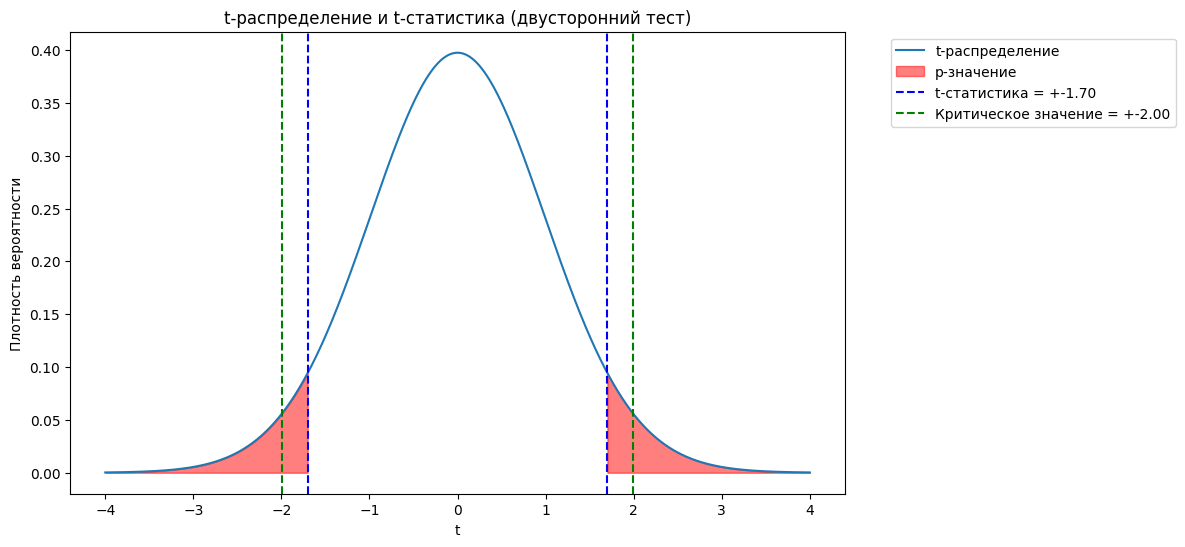

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(t_values, n_2 + n_3 - 2)

t_critical = stats.t.ppf(1 - alpha/2, n_2 + n_3 - 2)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label='p-значение')
plt.fill_between(t_values, pdf, where=(t_values <= -t), color='red', alpha=0.5)

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = +-{t:.2f}')
plt.axvline(-t, color='blue', linestyle='--')


plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = +-{t_critical:.2f}')
plt.axvline(-t_critical, color='green', linestyle='--')

plt.legend()
plt.title('t-распределение и t-статистика (двусторонний тест)')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(10, 6)

plt.show()

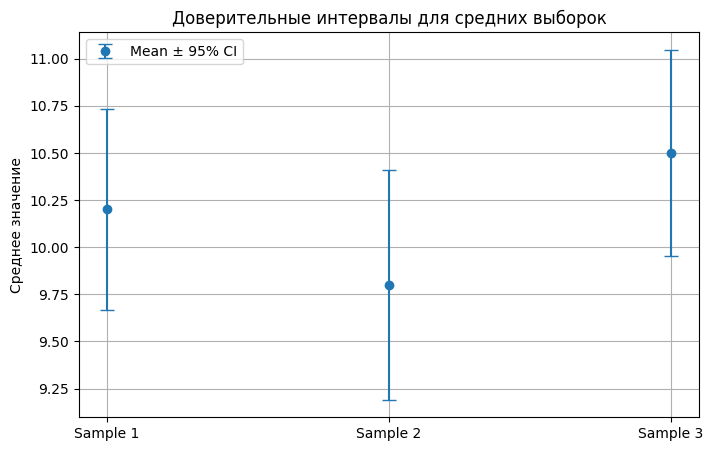

In [ ]:
left_1 = sample_mean_1 - t_critical*np.sqrt(sample_var_1/n_1)
right_1 = sample_mean_1 + t_critical*np.sqrt(sample_var_1/n_1)

left_2 = sample_mean_2 - t_critical*np.sqrt(sample_var_2/n_2)
right_2 = sample_mean_2 + t_critical*np.sqrt(sample_var_2/n_2)

left_3 = sample_mean_3 - t_critical*np.sqrt(sample_var_3/n_3)
right_3 = sample_mean_3 + t_critical*np.sqrt(sample_var_3/n_3)

means = [sample_mean_1, sample_mean_2, sample_mean_3]

cis = [[left_1, right_1], [left_2, right_2], [left_3, right_3]]

fig, ax = plt.subplots(figsize=(8, 5))
ax.errorbar(['Sample 1', 'Sample 2', 'Sample 3'], means, yerr=[(ci[1] - mean) for ci, mean in zip(cis, means)],
            fmt='o', capsize=5, label='Mean ± 95% CI')
ax.set_title('Доверительные интервалы для средних выборок')
ax.set_ylabel('Среднее значение')
plt.grid(True)

plt.legend()
plt.show()

### Задача 3 (1 балл)

Тестирование параметра распределения Пуассона

Выборка из 60 наблюдений была получена из распределения Пуассона с неизвестным параметром. Известно, что среднее количество наблюдений в выборке равно 4.8.

Проверьте гипотезу о том, что параметр распределения Пуассона равен 5 против альтернативы, что он меньше 5. Используйте уровень значимости 0.05.
Вычислите p-значение и сделайте вывод о гипотезе.

In [ ]:
# h0 - параметр Пуассона равен 5
# h1 - параметр Пуассона равен меньше 5

alpha = 0.05
n = 60
sample_mean = 4.8
lam = 5

df = n - 1
se = np.sqrt(lam/n)
z = (sample_mean - lam)/se
z_critical = stats.norm.ppf(alpha)

if (z > z_critical):
  print('Гипотеза о том, что параметр распределения Пуассона равен 5, не отклоняется')
else:
  print('Гипотеза о том, что параметр распределения Пуассона равен 5, отвергается')
print('Значение z:', round(z, 2), 'Значение критического z:', round(z_critical, 2))

p_value = stats.norm.cdf(z)
print(f"p-значение: {p_value:.4f}")


Гипотеза о том, что параметр распределения Пуассона равен 5, не отклоняется
Значение z: -0.69 Значение критического z: -1.64
p-значение: 0.2442


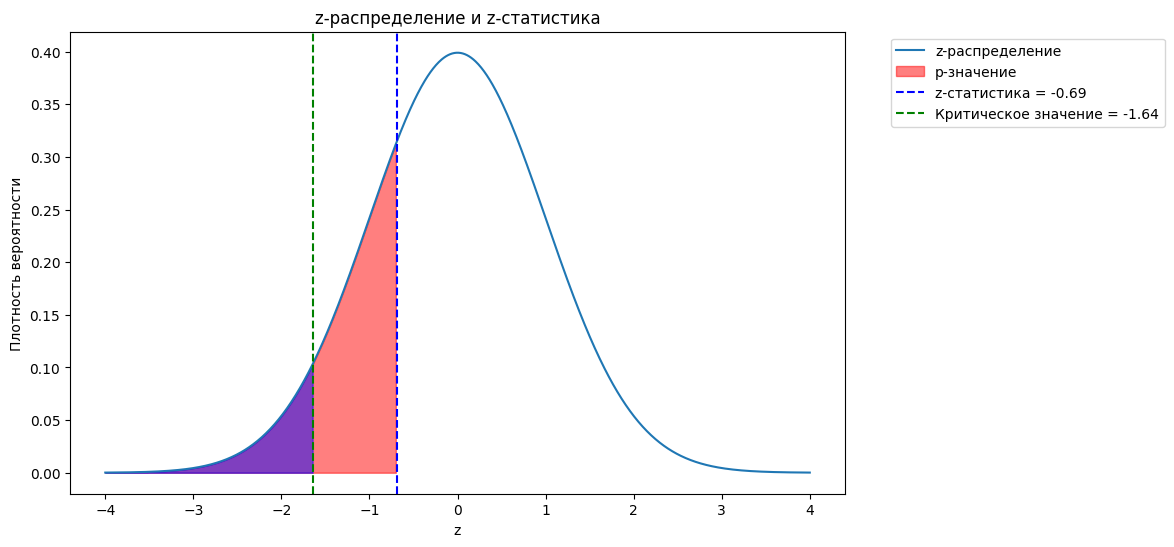

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values <= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values <= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(10, 6)

plt.show()

### Задача 4 (1 балл)

Компания заявляет, что среднее время работы их нового аккумулятора составляет 100 часов. Независимая лаборатория протестировала 25 случайно выбранных аккумуляторов и получила среднее время работы 95 часов при стандартном отклонении 10 часов. Можно ли на уровне значимости 1% утверждать, что реальное среднее время работы аккумуляторов меньше заявленного?

In [ ]:
alpha = 0.01
company_mean = 100
n = 25
lab_mean = 95
lab_std = 10

se = lab_std/np.sqrt(n)
t = (lab_mean - company_mean)/se
df = n - 1

t_critical = stats.t.ppf(alpha, df)

if(t > t_critical):
  print('Не отклоняем нулевую гипотезу о том, что среднее время работы нового аккумулятора составляет 100 часов')
else:
  print('Отклоняем нулевую гипотезу о том, что среднее время работы нового аккумулятора составляет 100 часов')


Отклоняем нулевую гипотезу о том, что среднее время работы нового аккумулятора составляет 100 часов


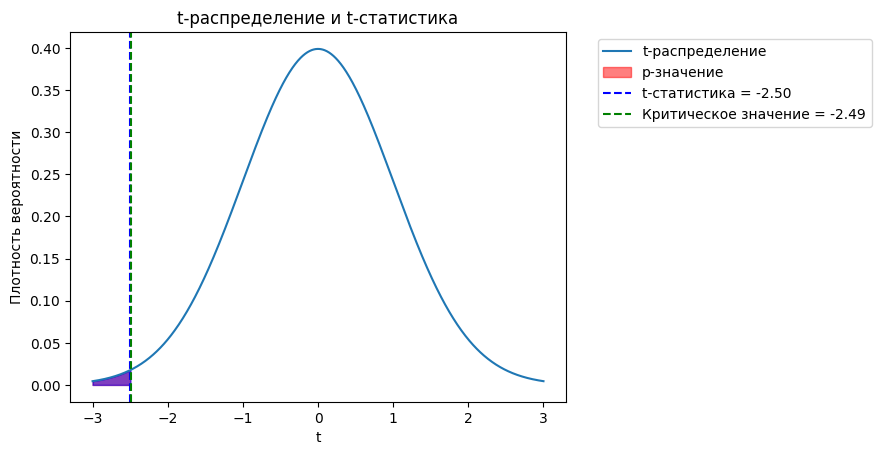

In [ ]:
t_values = np.linspace(-3, 3, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values <= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values <= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 5 (1 балл)

В ходе медицинского исследования сравнивается эффективность нового препарата для снижения артериального давления с существующим. Первой группе из 30 пациентов назначают новый препарат, и среднее снижение давления составляет 8 мм рт. ст. со стандартным отклонением 2 мм рт. ст. Второй группе из 30 пациентов дают существующий препарат, и среднее снижение составляет 6 мм рт. ст. со стандартным отклонением 3 мм рт. ст. Является ли новый препарат более эффективным на уровне значимости 5%?

In [ ]:
alpha = 0.05

n_1 = 30
mean_1 = 8
std_1 = 2

n_2 = 30
mean_2 = 6
std_2 = 3

union_var = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2)/(n_1 + n_2 - 2)
se = np.sqrt(union_var*(1/n_1 + 1/n_2))
t = (mean_1 - mean_2)/se
df = n_1 + n_2 - 2

t_critical = stats.t.ppf(1 - alpha, df)

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: препараты не работают с одинаковой эффективностью")
else:
    print("Не отклоняем нулевую гипотезу: препараты работают с одинаковой эффективностью")

Отклоняем нулевую гипотезу: препараты не работают с одинаковой эффективностью


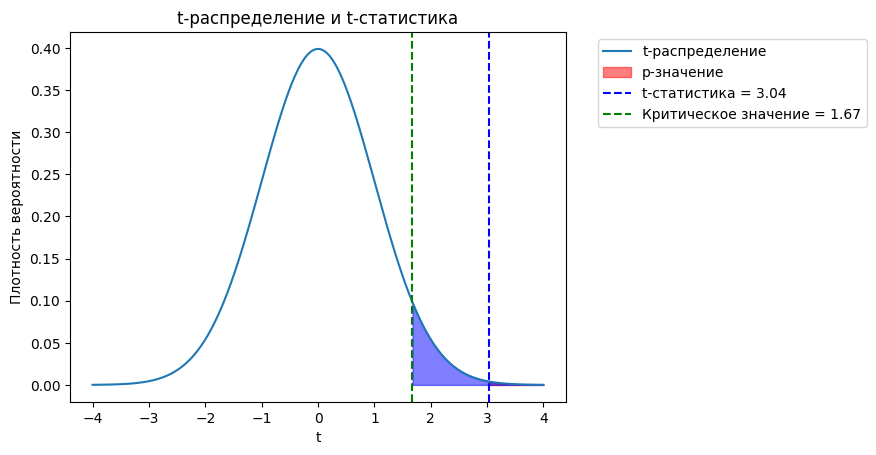

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 6 (1 балл)

В университете внедрили новую методику преподавания математики и хотят оценить ее влияние на успеваемость студентов. Средний балл по математике в предыдущие годы был 75. После внедрения методики группа из 50 студентов получила средний балл 78 с стандартным отклонением 5. Проверить на уровне значимости 1%, улучшилась ли успеваемость студентов.

In [ ]:
# H0 - успеваемость не улучшилась
# H1 - успеваемость улучшилась

alpha = 0.01
prev_mean = 75
n = 50
cur_mean = 78
cur_std = 5

t_critical = stats.t.ppf(1 - alpha, n - 1)
t = (cur_mean - prev_mean) / (cur_std/np.sqrt(n))

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: новая методика, вероятно, лучше")
else:
    print("Не отклоняем нулевую гипотезу: методики эквивалентны")



Отклоняем нулевую гипотезу: новая методика, вероятно, лучше


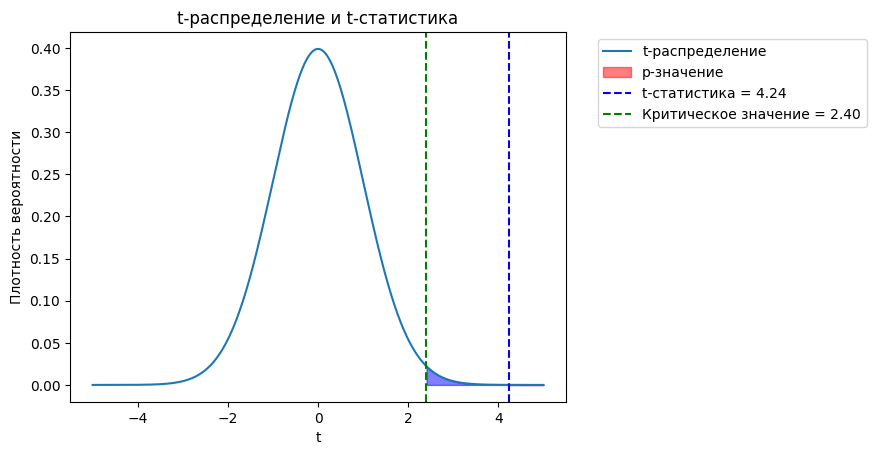

In [ ]:
t_values = np.linspace(-5, 5, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 7 (1 балл)

Производитель утверждает, что его новый процессор работает на 20% быстрее предыдущей модели. Для проверки этого заявления были протестированы 40 новых и 40 старых процессоров. Новые процессоры в среднем выполняли задачу за 8 секунд с стандартным отклонением 1 секунда, старые — за 10 секунд с стандартным отклонением 1,5 секунды. Соответствует ли утверждение производителя действительности на уровне значимости 2%?

In [ ]:
alpha = 0.02

n_old = 40
mean_old = 10
std_old = 1.5

n_new = 40
mean_new = 8
std_new = 1

t_critical = stats.t.ppf(1 - alpha/2, n_old + n_new - 2)

# гипотеза о разнице средних на конкретную величину
t = ((mean_old - mean_new)/mean_old - 0.2) / (std_old/np.sqrt(n_old) + std_new/np.sqrt(n_new))

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: вероятно, новые процессоры не лучше старых")
else:
    print("Не отклоняем нулевую гипотезу: не можем сказать, что новые процессоры не работают лучше на 20%")

Не отклоняем нулевую гипотезу: не можем сказать, что новые процессоры не работают лучше на 20%


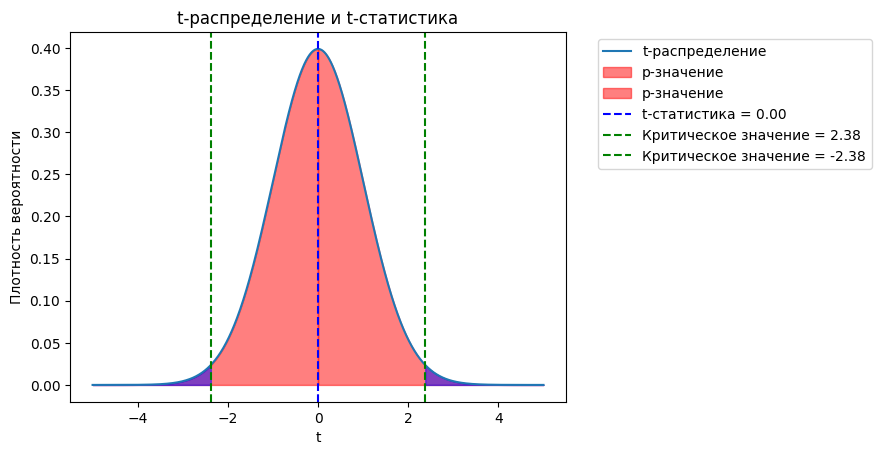

In [ ]:
t_values = np.linspace(-5, 5, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')
plt.fill_between(t_values, pdf, where=(t_values <= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.axvline(-t_critical, color='green', linestyle='--', label=f'Критическое значение = {-t_critical:.2f}')

plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)
plt.fill_between(t_values, pdf, where=(t_values <= -t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 8 (1 балл)

После введения новых экологических стандартов исследователь хочет определить, снизился ли уровень загрязнения воздуха в городе. До введения стандартов средняя концентрация вредных веществ составляла 50 мкг/м³. Через год после внедрения было проведено 36 измерений, и средняя концентрация составила 47 мкг/м³ со стандартным отклонением 4 мкг/м³. Можно ли на уровне значимости 5% считать, что уровень загрязнения воздуха снизился?

In [ ]:
alpha = 0.05

mean_old = 50

n_new = 36
mean_new = 47
std_new = 4

se = std_new/np.sqrt(n_new)
t = (mean_new - mean_old)/se

t_critical = stats.t.ppf(alpha, n_new - 1)
print(t, t_critical)
if t <= t_critical:
    print("Отклоняем нулевую гипотезу: воздух стал чище и жаб-жабычам теперь комфортнее в городе! (восклицательный знак с нотками сомнения)")
else:
    print("Не отклоняем нулевую гипотезу: воздух чище не стал и жаб-жабычам все так же некомфортно в городе:(")


-4.5 -1.6895724577802658
Отклоняем нулевую гипотезу: воздух стал чище и жаб-жабычам теперь комфортнее в городе! (восклицательный знак с нотками сомнения)


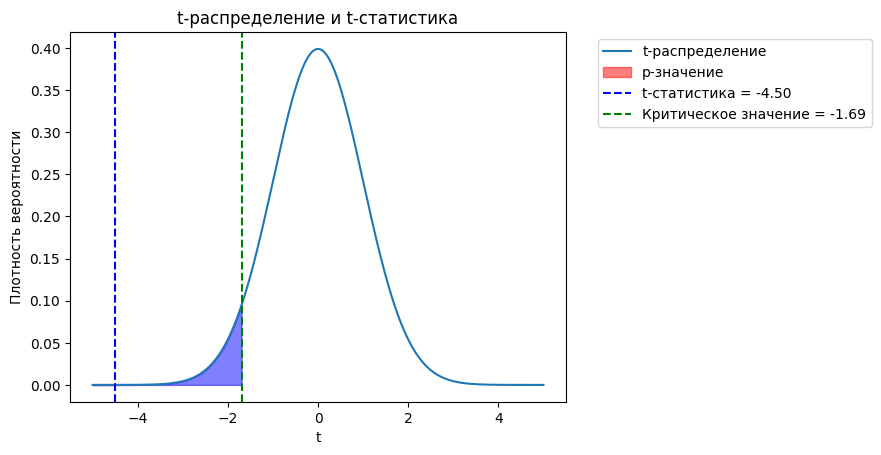

In [ ]:
t_values = np.linspace(-5, 5, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values <= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')

plt.fill_between(t_values, pdf, where=(t_values <= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 9 (1 балл)

В школе проводят эксперимент, чтобы выяснить, влияет ли дополнительное занятие по чтению на скорость чтения учеников. Учеников случайным образом разделили на две группы по 20 человек. Первая группа занималась по стандартной программе и показала среднюю скорость чтения 150 слов в минуту со стандартным отклонением 15 слов. Вторая группа посещала дополнительные занятия и показала среднюю скорость 160 слов в минуту со стандартным отклонением 10 слов. Является ли разница в скоростях статистически значимой на уровне значимости 5%?

In [ ]:
alpha = 0.05

n_1 = 20
mean_1 = 150
std_1 = 15

n_2 = 20
mean_2 = 160
std_2 = 10

union_var = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2)/(n_1 + n_2 - 2)
se = np.sqrt(union_var*(1/n_1 + 1/n_2))
t = (mean_1 - mean_2)/se
df = n_1 + n_2 - 2

t_critical = stats.t.ppf(alpha, df)

if t <= t_critical:
    print("Отклоняем нулевую гипотезу: дополнительные занятие скорее всего дали свой эффект")
else:
    print("Не отклоняем нулевую гипотезу: статистически значимой разницы между методами не выявлено")



Отклоняем нулевую гипотезу: дополнительные занятие скорее всего дали свой эффект


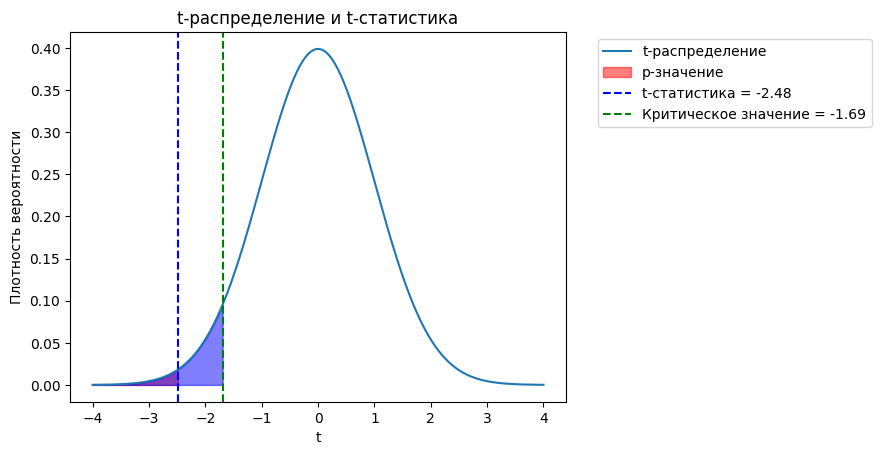

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values <= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values <= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 10 (1 балл)

Автомобильная компания хочет определить, влияет ли новый тип топлива на эффективность расхода топлива. В тесте участвовали 30 автомобилей, использующих обычное топливо, и 30 автомобилей на новом топливе. Средний расход для обычного топлива составил 8 литров на 100 км с стандартным отклонением 0,5 литра, для нового топлива — 7,5 литров на 100 км с стандартным отклонением 0,4 литра. Проверьте на уровне значимости 1%, улучшает ли новый тип топлива эффективность.

In [ ]:
alpha = 0.01

n_old = 30
mean_old = 8
std_old = 0.5

n_new = 30
mean_new = 7.5
std_new = 0.4

union_var = ((n_old - 1) * std_old**2 + (n_new - 1) * std_new**2)/(n_old + n_new - 2)
se = np.sqrt(union_var*(1/n_old + 1/n_new))
t = (mean_old - mean_new)/se
df = n_old + n_new - 2

t_critical = stats.t.ppf(1 - alpha, df)

if t <= t_critical:
    print("Отклоняем нулевую гипотезу: новое топливо, вероятно, эффективнее")
else:
    print("Не отклоняем нулевую гипотезу: разницы между топливами не выявлено")

Не отклоняем нулевую гипотезу: разницы между топливами не выявлено


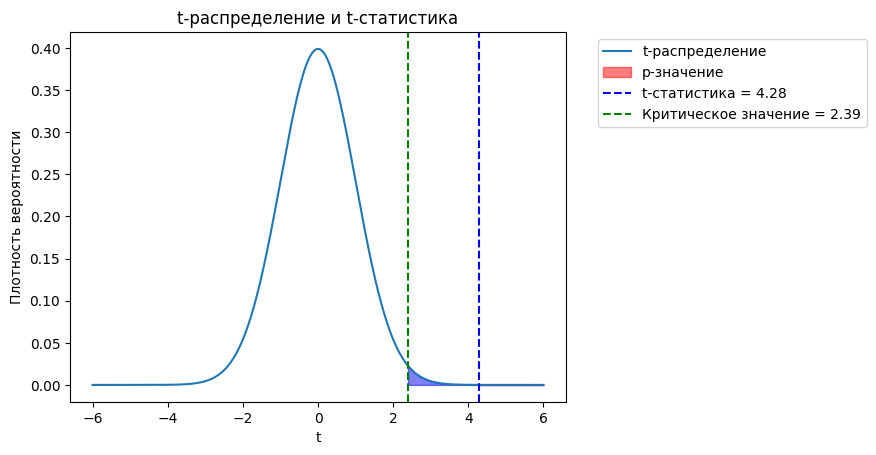

In [ ]:
t_values = np.linspace(-6, 6, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 11 (1 балл)

В исследовании психологии изучается влияние медитации на уровень стресса. Уровень стресса измеряется по шкале от 0 до 100. До начала программы медитации у группы из 25 участников средний уровень стресса был 70 с стандартным отклонением 8. После программы средний уровень снизился до 65 с стандартным отклонением 7. Является ли снижение уровня стресса статистически значимым на уровне значимости 5%?

In [ ]:
alpha = 0.05

n_old = 25
mean_old = 70
std_old = 8

n_new = 25
mean_new = 65
std_new = 7

union_var = ((n_old - 1) * std_old**2 + (n_new - 1) * std_new**2)/(n_old + n_new - 2)
se = np.sqrt(union_var*(1/n_old + 1/n_new))
t = (mean_old - mean_new)/se
df = n_old + n_new - 2

t_critical = stats.t.ppf(1 - alpha, df)

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: вероятно, медитации могут помочь в борьбе со стрессом")
else:
    print("Не отклоняем нулевую гипотезу: медитации не помогают. \n\n- А как вы расслабляетесь? \n- А мы не напрягаемся")

Отклоняем нулевую гипотезу: вероятно, медитации могут помочь в борьбе со стрессом


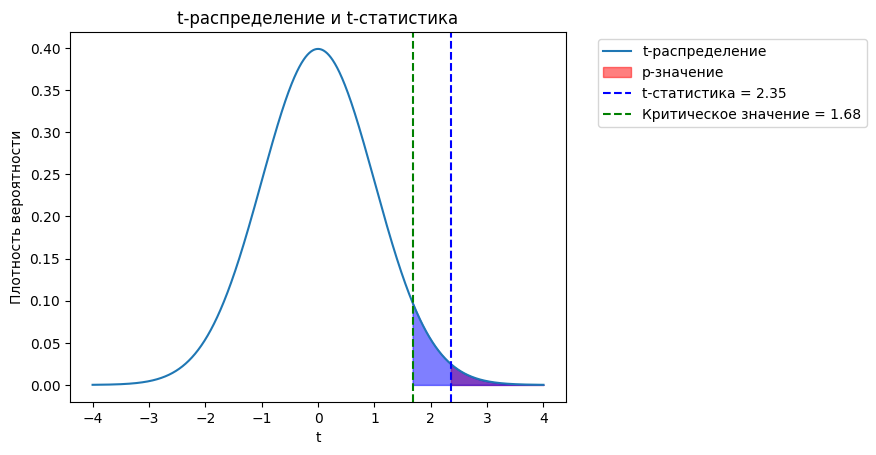

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 12 (1 балл)

Компания по производству напитков изменила рецепт своего продукта и хочет определить, повлияло ли это на предпочтения потребителей. В тестировании участвовали 200 человек, из которых 110 предпочли новый рецепт, а остальные остались нейтральны или выбрали старый. Можно ли на уровне значимости 1% утверждать, что большинство потребителей предпочитают новый рецепт?

In [ ]:
alpha = 0.01

n = 200
n_new = 110
n_old = n - n_new

p = n_new/n
se = np.sqrt(p * (1 - p)/n)

# 0.5, потому что мы проверяем нулевую гипотезу о том, что доли равны
z = (p - 0.5)/se

z_critical = stats.norm.ppf(1 - alpha)

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: большинство потребителей предпочитают новый рецепт")
else:
    print("Не отклоняем нулевую гипотезу: большинство не предпочитает новый рецепт (скорее это половина потребителей)")

Не отклоняем нулевую гипотезу: большинство не предпочитает новый рецепт (скорее это половина потребителей)


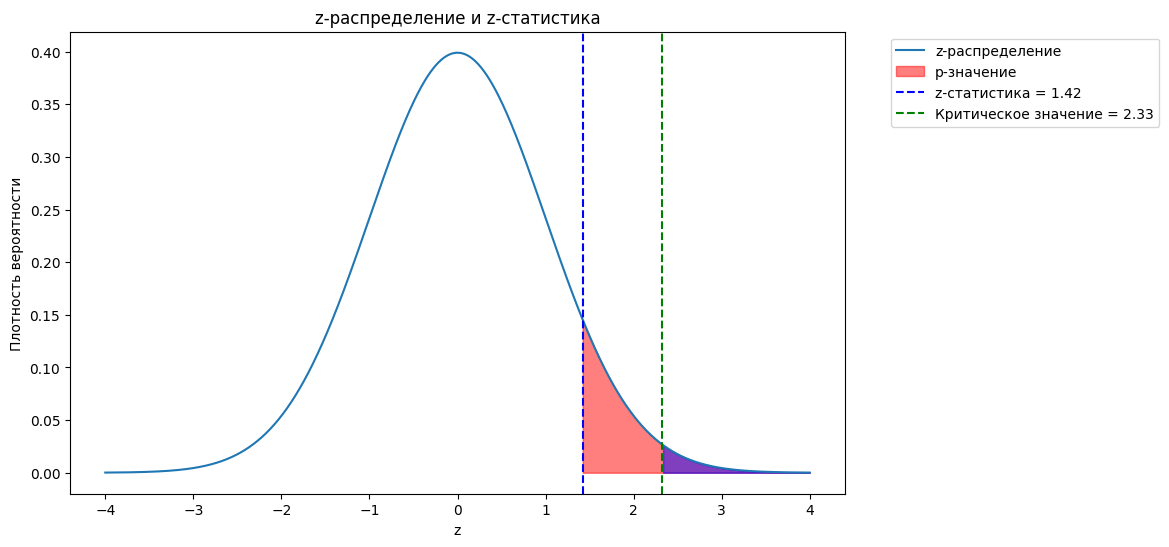

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gcf().set_size_inches(10, 6)

plt.show()

### Задача 13 (1 балл)

В ходе эксперимента изучается влияние нового удобрения на рост растений. Группе из 15 растений добавляли новое удобрение, и средний рост составил 25 см с стандартным отклонением 3 см. Контрольная группа из 15 растений без удобрения показала средний рост 22 см с стандартным отклонением 2,5 см. Проверить на уровне значимости 5%, является ли разница в росте статистически значимой.

In [ ]:
apha = 0.05

n_new = 15
mean_new = 25
std_new = 3

n_control = 15
mean_control = 22
std_control = 2.5

union_var = ((n_new - 1) * std_new**2 + (n_control - 1) * std_control**2)/(n_new + n_control - 2)
se = np.sqrt(union_var*(1/n_new + 1/n_control))

t = (mean_new - mean_control)/se
df = n_new + n_control - 2

t_critical = stats.t.ppf(1 - alpha, df)

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: есть разница в среднем росте растений с применением удобрений")
else:
    print("Не отклоняем нулевую гипотезу: нет разницы, использовать ли удобрения или обойтись без них")

Отклоняем нулевую гипотезу: есть разница в среднем росте растений с применением удобрений


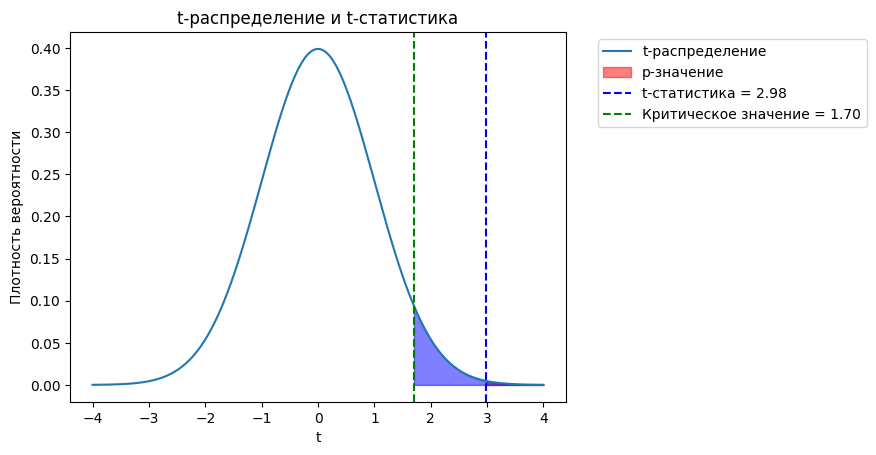

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 14 (5 баллов за все пункты)

Пункт 1. Компания внедряет новую программу обучения сотрудников с целью повышения производительности труда. Ранее средняя производительность составляла 50 единиц в день при стандартном отклонении 8 единиц. После года действия программы случайно выбранная выборка из 80 сотрудников показала среднюю производительность 52 единицы. Считаем, что стандартное отклонение осталось неизменным. Можно ли на основе этих данных утверждать, что программа обучения действительно повысила производительность, или наблюдаемый результат мог возникнуть случайно? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста (двусторонний, левосторонний или правосторонний) и проверьте нулевую гипотезу на уровнях значимости α = 1% и α = 5%.


---

Пункт 2. Решите пункт 1, если выборка состоит лишь из 5 сотрудников.


---

Пункт 3. Решите пункт 1 при условии, что стандартное отклонение увеличилось до 16 единиц.


---

Пункт 4. Решите пункт 1, если после внедрения программы средняя производительность составила 51 единицу.


---

Пункт 5. Решите пункт 1, если стандартное отклонение неизвестно, а выборка составила 25 сотрудников. Несмещённая оценка дисперсии выборки составила 64. Примите уровень значимости равным 5%.

In [ ]:
alpha = 0.01

old_mean = 50
old_std = 8

new_n = 80
new_mean = 52
new_std = 8

Пусть наша нулевая гипотеза - гипотеза о том, что средняя производительность не изменилась.

Альтернативная ей гипотеза - средняя производительность увеличилась.

Тип теста - правосторонний.

In [ ]:
z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


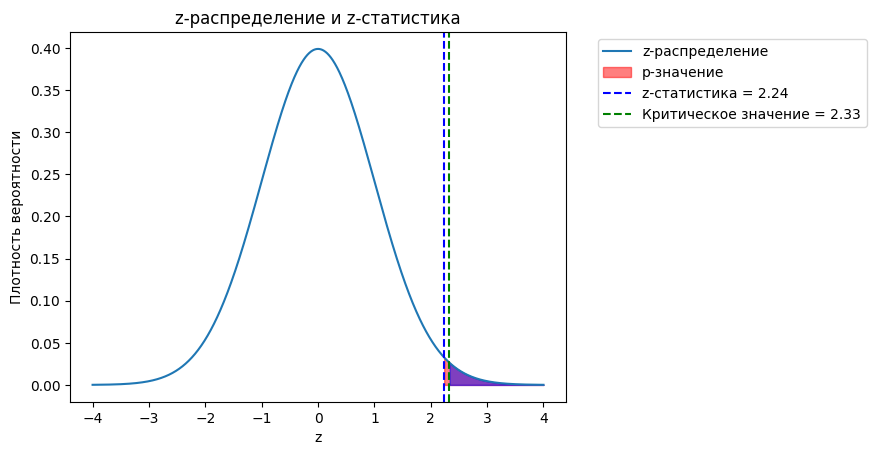

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Теперь проверяем на alpha = 0.05

In [ ]:
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Отклоняем нулевую гипотезу: производительность увеличилась


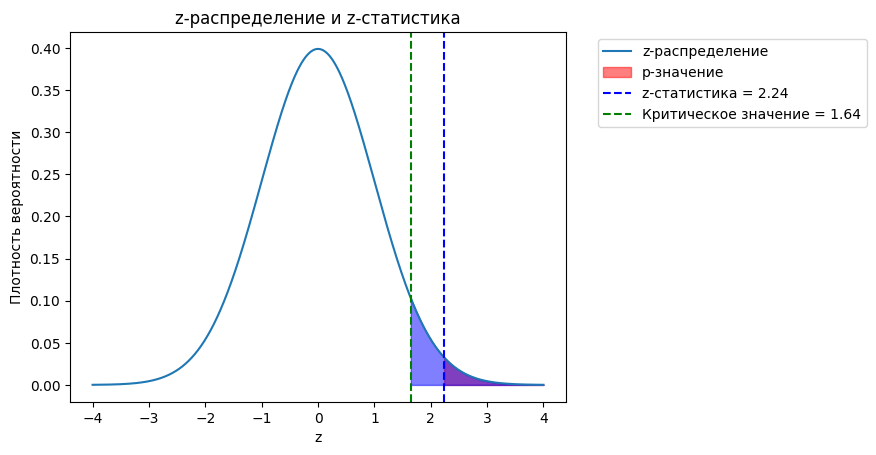

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Пункт 2. Выборка из 5 человек.

In [ ]:
new_n = 5
alpha = 0.01

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


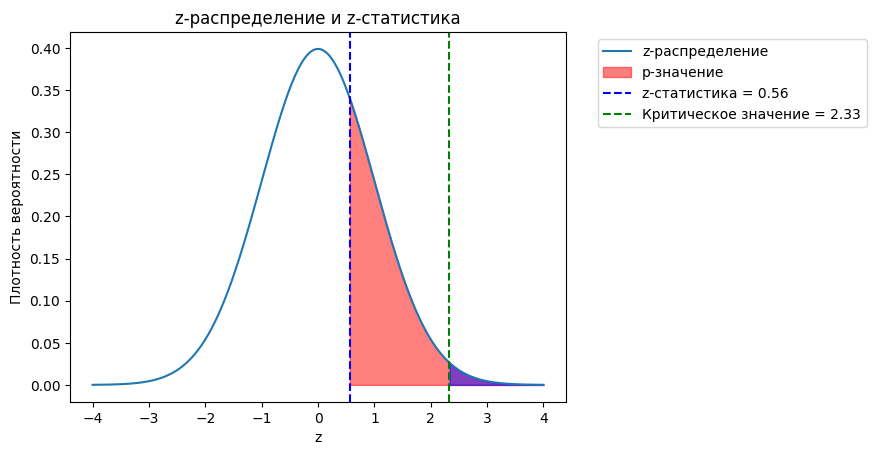

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
new_n = 5
alpha = 0.05

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


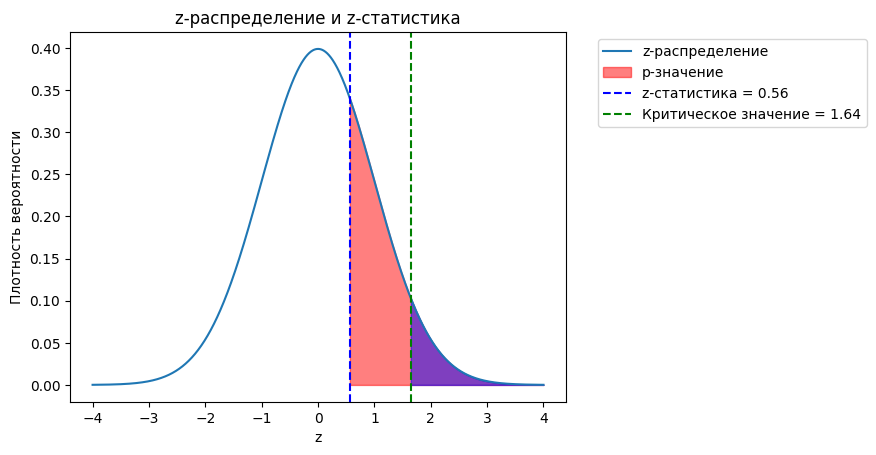

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Пункт 3. Решите пункт 1 при условии, что стандартное отклонение увеличилось до 16 единиц.

In [ ]:
alpha = 0.01
new_n = 80
old_std = 16

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


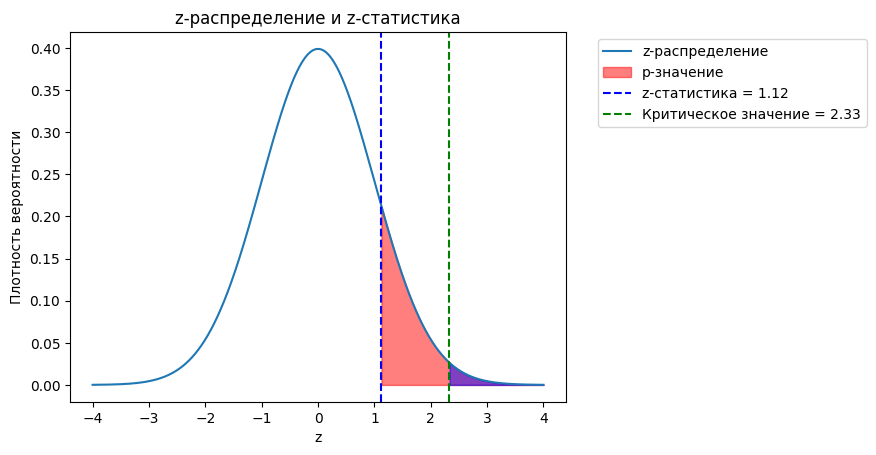

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
alpha = 0.05
new_n = 80
old_std = 16

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


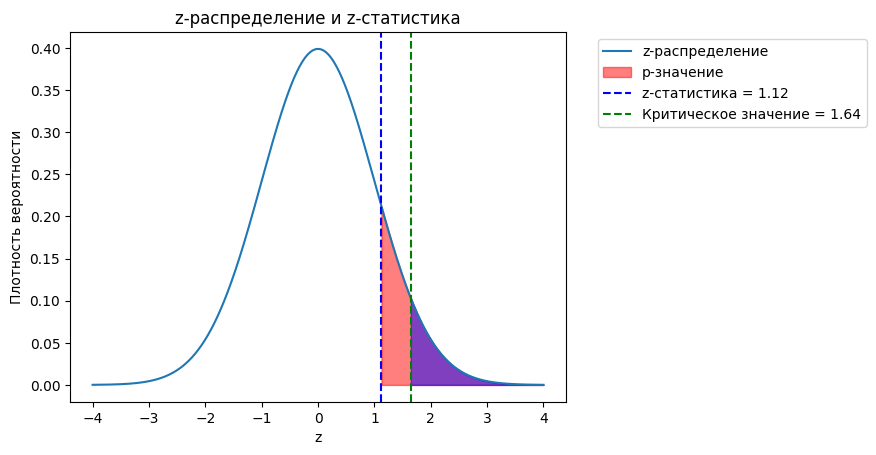

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Пункт 4. Решите пункт 1, если после внедрения программы средняя производительность составила 51 единицу.

In [ ]:
alpha = 0.01
old_std = 8
new_mean = 51

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


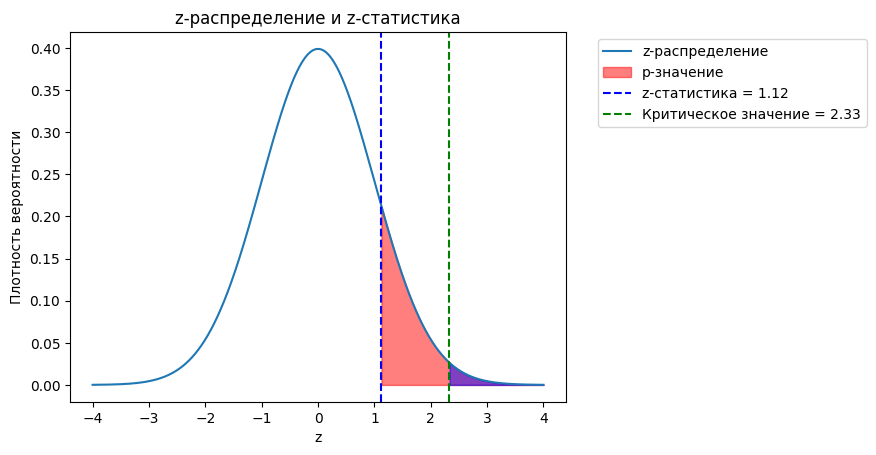

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
alpha = 0.01

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (old_std/np.sqrt(new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")


Не отклоняем нулевую гипотезу: производительность осталась прежней


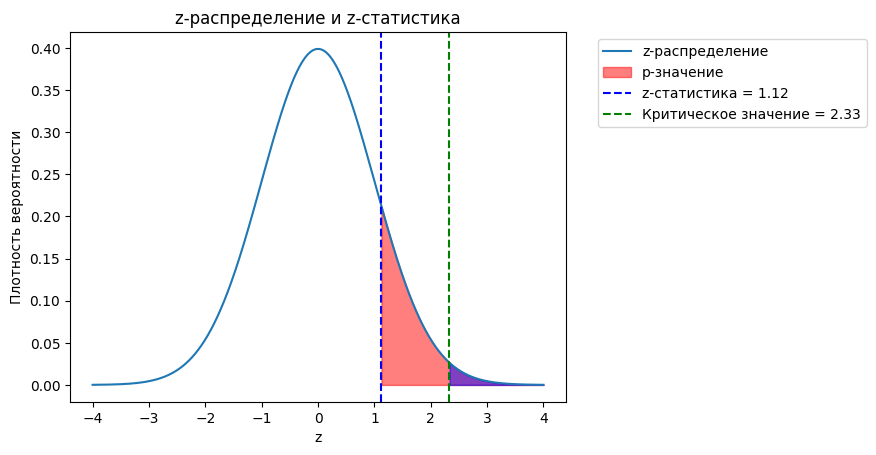

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Пункт 5. Решите пункт 1, если стандартное отклонение неизвестно, а выборка составила 25 сотрудников. Несмещённая оценка дисперсии выборки составила 64. Примите уровень значимости равным 5%.

In [ ]:
alpha = 0.05
unbiased_var = 64
n_new = 25

z_critical = stats.norm.ppf(1 - alpha)
z = (new_mean - old_mean) / (np.sqrt(unbiased_var/new_n))

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: производительность увеличилась")
else:
    print("Не отклоняем нулевую гипотезу: производительность осталась прежней")

Не отклоняем нулевую гипотезу: производительность осталась прежней


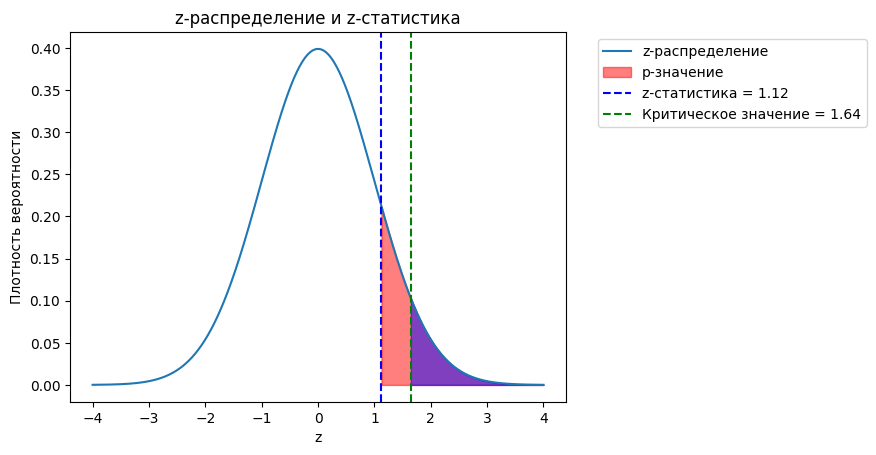

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 15 (3 балла за все пункты)

Задача 1. Компания оценивает эффективность нового программного обеспечения для повышения производительности сотрудников. Перед установкой ПО среднее время выполнения определённой задачи у 60 сотрудников составляло 100 минут с известным стандартным отклонением 12 минут. После установки нового ПО среднее время выполнения той же задачи снизилось до 95 минут. Считаем, что стандартное отклонение осталось неизменным. Можно ли на уровне значимости α = 5% утверждать, что новое ПО действительно снижает время выполнения задачи? Сформулируйте нулевую и альтернативную гипотезы, определите тип теста и проверьте нулевую гипотезу.


---

Задача 2. Решите задачу 1, если стандартное отклонение после установки нового ПО неизвестно, а выборка составляет 25 сотрудников. По полученным данным несмещённая оценка дисперсии после установки ПО составляет 144 минуты².


---

Задача 3. Компания сравнивает эффективность двух независимых групп сотрудников: первая группа из 50 человек использует старое ПО, вторая группа из 50 человек — новое ПО. Среднее время выполнения задачи в первой группе составляет 100 минут со стандартным отклонением 12 минут, во второй группе — 95 минут со стандартным отклонением 12 минут. Можно ли на уровне значимости α = 5% утверждать, что новое ПО снижает время выполнения задачи по сравнению со старым?


---

Задача 4. Для оценки влияния обучающего курса на навыки сотрудников компания измеряет время выполнения задачи у 30 сотрудников до и после прохождения курса. Среднее время до обучения составляет 80 минут, после обучения — 75 минут. Известно, что стандартное отклонение разностей времени (до и после) составляет 5 минут. Можно ли на уровне значимости α = 1% утверждать, что обучение улучшило навыки сотрудников? Сформулируйте нулевую и альтернативную гипотезы и выберите подходящий статистический тест.


---

Задача 5. Решите задачу 4, если стандартное отклонение разностей времени неизвестно, а несмещённая оценка дисперсии разностей составляет 25 минут². Примите уровень значимости равным 1%.

In [ ]:
alpha = 0.05

n_old = 60
mean_old = 100
std_old = 12

n_new = 60
mean_new = 95
std_new = 12

• Сформулируем нулевую гипотезу следующим образом: среднее время выполнения задачи не изменилось.

• Альтернативная гипотеза: среднее время выполнения уменьшилось.

• Тест левосторонний, т.к. смотрим на уменьшение значения среднего времени выполнения.

• Используем z-статистику, поскольку у нас известно стандартное отклонение и количество элементов в выборке довольно большое



In [ ]:
z = (mean_new - mean_old) / (std_old / np.sqrt(n_old))
z_critical = stats.norm.ppf(alpha)

if z <= z_critical:
    print("Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось")
else:
    print("Не отклоняем нулевую гипотезу: установка нового ПО никак не повлияло")

Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось


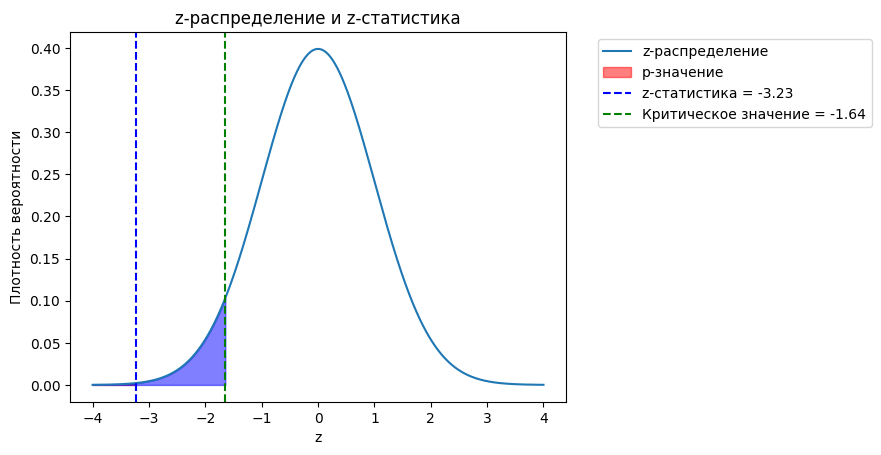

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values <= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values <= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Задача 2. Решите задачу 1, если стандартное отклонение после установки нового ПО неизвестно, а выборка составляет 25 сотрудников. По полученным данным несмещённая оценка дисперсии после установки ПО составляет 144 минуты².

In [ ]:
n = 25
var = 144

t = (mean_new - mean_old) / np.sqrt(var/n)
t_critical = stats.t.ppf(alpha, n_new - 1)

if t <= t_critical:
    print("Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось")
else:
    print("Не отклоняем нулевую гипотезу: установка нового ПО никак не повлияло")

Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось


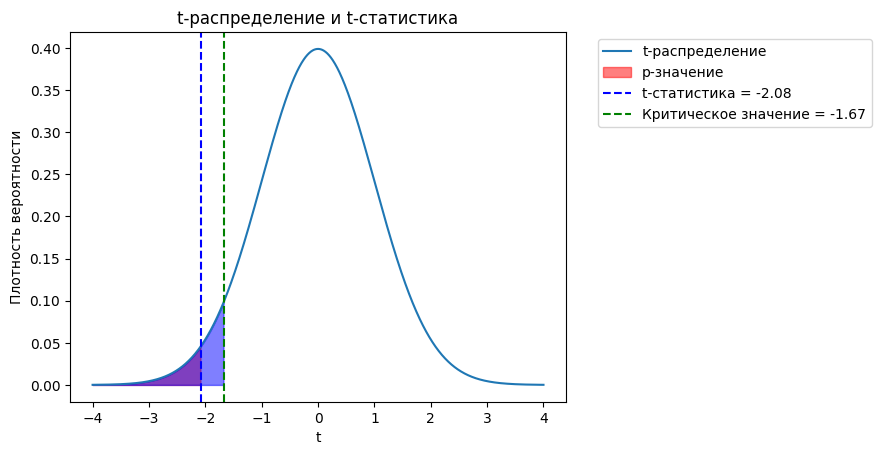

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values <= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values <= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Задача 3. Компания сравнивает эффективность двух независимых групп сотрудников: первая группа из 50 человек использует старое ПО, вторая группа из 50 человек — новое ПО. Среднее время выполнения задачи в первой группе составляет 100 минут со стандартным отклонением 12 минут, во второй группе — 95 минут со стандартным отклонением 12 минут. Можно ли на уровне значимости α = 5% утверждать, что новое ПО снижает время выполнения задачи по сравнению со старым?

In [ ]:
alpha = 0.05

n_1 = 50
mean_1 = 100
std_1 = 12

n_2 = 50
mean_2 = 95
std_2 = 12

In [ ]:
union_var = ((n_1 - 1) * std_1**2 + (n_2 - 1) * std_2**2)/(n_1 + n_2 - 2)
se = np.sqrt(union_var*(1/n_1 + 1/n_2))
t = (mean_2 - mean_1)/se
df = n_1 + n_2 - 2

t_critical = stats.t.ppf(alpha, df)

if t <= t_critical:
    print("Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось")
else:
    print("Не отклоняем нулевую гипотезу: установка нового ПО никак не повлияло")

Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось


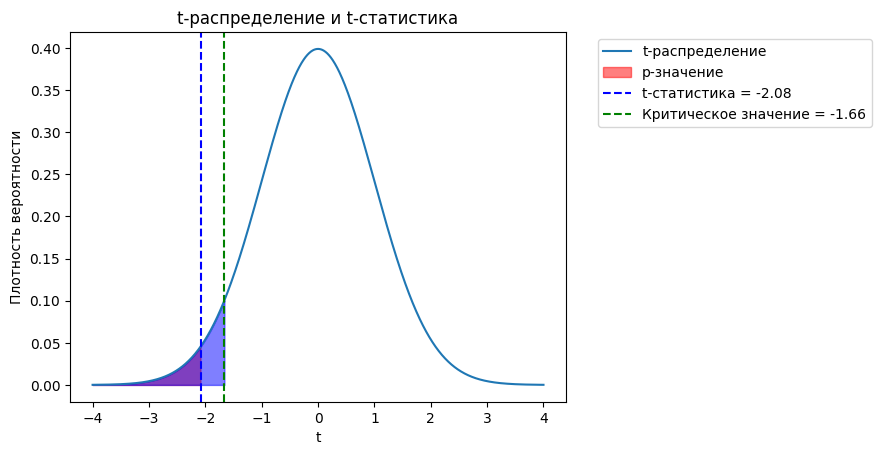

In [ ]:
t_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values <= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values <= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Задача 4. Для оценки влияния обучающего курса на навыки сотрудников компания измеряет время выполнения задачи у 30 сотрудников до и после прохождения курса. Среднее время до обучения составляет 80 минут, после обучения — 75 минут. Известно, что стандартное отклонение разностей времени (до и после) составляет 5 минут. Можно ли на уровне значимости α = 1% утверждать, что обучение улучшило навыки сотрудников? Сформулируйте нулевую и альтернативную гипотезы и выберите подходящий статистический тест.

In [ ]:
# Парный тест, т.к. имеем стандартное отклонение разностей
# H0 - разницы в эффективности нет
# H1 - сотрудники действительно стали быстрее выполнять задачи

alpha = 0.01
n = 30

mean_before = 80
mean_after = 75

diff_std = 5

t = (mean_before - mean_after)/(diff_std/np.sqrt(n))
t_critical = stats.t.ppf(1 - alpha, df)

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось")
else:
    print("Не отклоняем нулевую гипотезу: обучающий курс никак не повлиял")


Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось


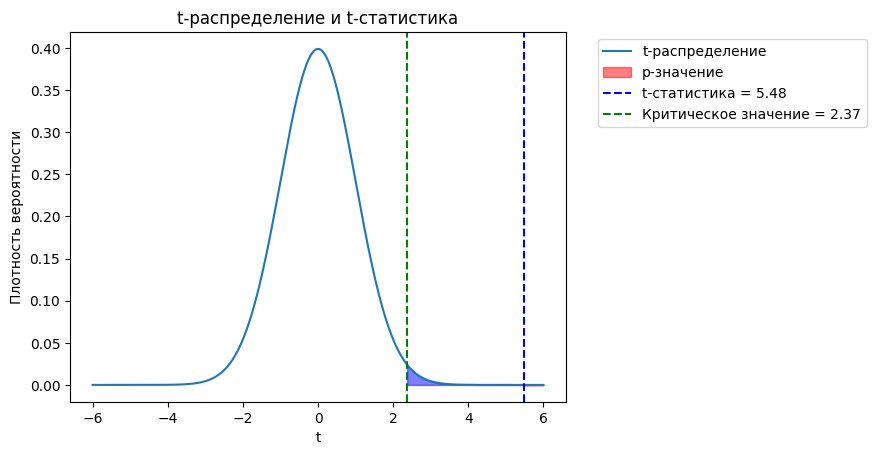

In [ ]:
t_values = np.linspace(-6, 6, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Задача 5. Решите задачу 4, если стандартное отклонение разностей времени неизвестно, а несмещённая оценка дисперсии разностей составляет 25 минут². Примите уровень значимости равным 1%.

In [ ]:
alpha = 0.01

alpha = 0.01
n = 30

mean_before = 80
mean_after = 75

diff_var = 25

t = (mean_before - mean_after)/np.sqrt(diff_var/n)
t_critical = stats.t.ppf(1 - alpha, df)

if t >= t_critical:
    print("Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось")
else:
    print("Не отклоняем нулевую гипотезу: обучающий курс никак не повлиял")

Отклоняем нулевую гипотезу: среднее время выполнение задач уменьшилось


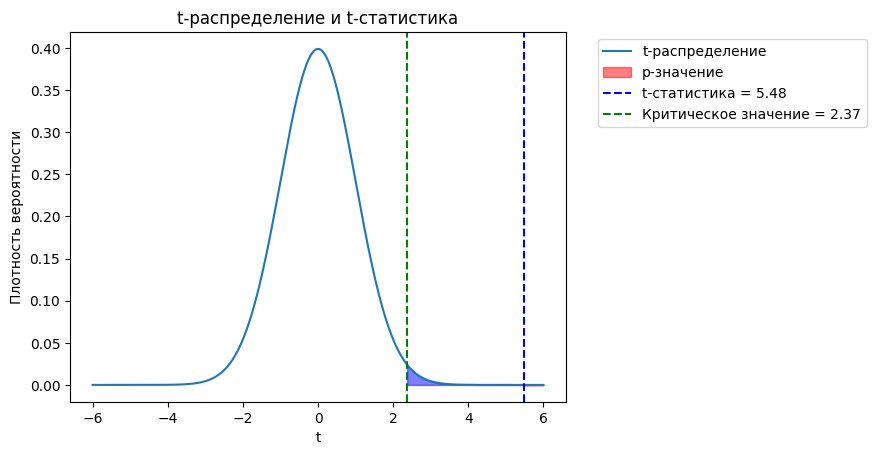

In [ ]:
t_values = np.linspace(-6, 6, 1000)
pdf = stats.norm.pdf(t_values)

plt.plot(t_values, pdf, label='t-распределение')

plt.fill_between(t_values, pdf, where=(t_values >= t), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(t, color='blue', linestyle='--', label=f't-статистика = {t:.2f}')

plt.axvline(t_critical, color='green', linestyle='--', label=f'Критическое значение = {t_critical:.2f}')
plt.fill_between(t_values, pdf, where=(t_values >= t_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('t-распределение и t-статистика')
plt.xlabel('t')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Задача 16 (4 балла за все пункты)

Монетку подбросили n=150 раз. Из них выпало Y орлов. Вероятность выпадения орла равна p.

(a) При каких значениях Y вы отвергнете нулевую гипотезу H0:p=1/2 против односторонней альтернативы p>1/2 на уровне значимости α=0.05?

(b) Предположим, что на самом деле H0​ не выполняется, а выполняется H1​, и вероятность выпадения орла равна p=1/2+δ, где δ=1/10. При этом мы не знаем точное значение p, но действуем согласно нашему критерию. С какой вероятностью мы при этом отвергнем гипотезу H0​? Какова вероятность совершить ошибку второго рода (не отвергнуть H0​, когда H1​ истинна)?

(c) Решите ту же задачу для δ=1/100.

(d) Решите ту же задачу для δ=1/100 и n=1000.

Здесь мы имеем дело с биномиальным распределением. Вспомним вычисление его статистических показателей:
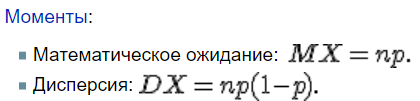


In [ ]:
alpha = 0.05

n = 150
Y = 85

p = Y/n
se = np.sqrt(p * (1 - p)/n)

z = (p - 0.5)/se

z_critical = stats.norm.ppf(1 - alpha)

if z >= z_critical:
    print("Отклоняем нулевую гипотезу: p > 1/2")
else:
    print("Не отклоняем нулевую гипотезу: p = 1/2")

Отклоняем нулевую гипотезу: p > 1/2


Эмпирическим путем было выявлено, что при 85 орлах и больше мы уже не можем утверждать, что вероятность выпадения орла равна 0,5. Либо можно было решить уравнение относительно Y.

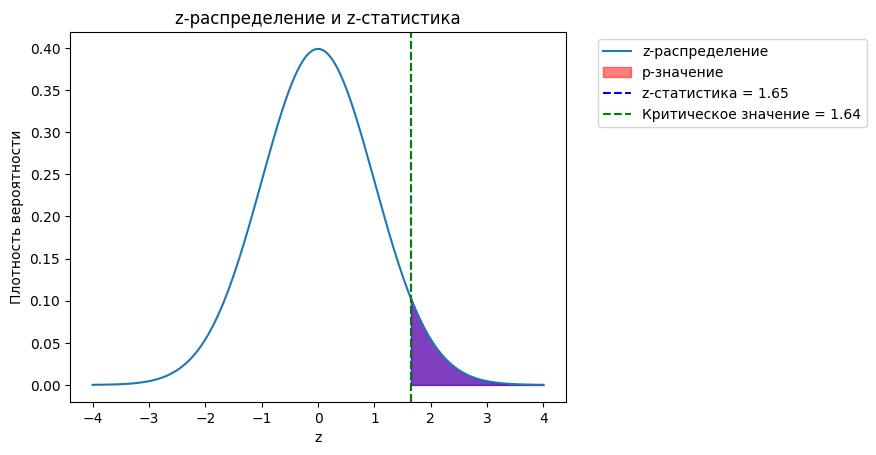

In [ ]:
z_values = np.linspace(-4, 4, 1000)
pdf = stats.norm.pdf(z_values)

plt.plot(z_values, pdf, label='z-распределение')

plt.fill_between(z_values, pdf, where=(z_values >= z), color='red', alpha=0.5, label = 'p-значение')

plt.axvline(z, color='blue', linestyle='--', label=f'z-статистика = {z:.2f}')

plt.axvline(z_critical, color='green', linestyle='--', label=f'Критическое значение = {z_critical:.2f}')
plt.fill_between(z_values, pdf, where=(z_values >= z_critical), color='blue', alpha=0.5)

plt.legend()
plt.title('z-распределение и z-статистика')
plt.xlabel('z')
plt.ylabel('Плотность вероятности')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
delta = 0.1
z_alpha = stats.norm.ppf(1 - alpha)
p = 0.5 + delta
mu = n*p
std = np.sqrt(n*p*(1 - p))

# мы отвергаем нулевую гипотезу при количестве орлов 85 и больше
z = (85 - mu)/std

beta = stats.norm.cdf(z) # P(Z ≥ z)
power = 1 - beta
print("Вероятность правильно отвергнуть нулевую гипотезу, отдавая предпочтение альтернативной гипотезе:", round(power, 4))
print("Соответственно, вероятность совершить ошибку второго рода:", round(beta, 4))

Вероятность правильно отвергнуть нулевую гипотезу, отдавая предпочтение альтернативной гипотезе: 0.7977
Соответственно, вероятность совершить ошибку второго рода: 0.2023


In [ ]:
delta = 0.01
p = 0.5 + delta
mu = n*p
std = np.sqrt(n*p*(1 - p))

# мы отвергаем нулевую гипотезу при количестве орлов 85 и больше
z = (85 - mu)/std

beta = stats.norm.cdf(z) # P(Z ≥ z)
power = 1 - beta
print("Вероятность правильно отвергнуть нулевую гипотезу, отдавая предпочтение альтернативной гипотезе:", round(power, 4))
print("Соответственно, вероятность совершить ошибку второго рода:", round(beta, 4))

Вероятность правильно отвергнуть нулевую гипотезу, отдавая предпочтение альтернативной гипотезе: 0.0825
Соответственно, вероятность совершить ошибку второго рода: 0.9175


In [ ]:
delta = 0.01
n = 1000
p = 0.5 + delta
mu = n*p
std = np.sqrt(n*p*(1 - p))

# мы отвергаем нулевую гипотезу при количестве орлов 85 и больше
z = (85 - mu)/std

beta = stats.norm.cdf(z) # P(Z ≥ z)
power = 1 - beta
print("Вероятность правильно отвергнуть нулевую гипотезу, отдавая предпочтение альтернативной гипотезе:", power)
print("Соответственно, вероятность совершить ошибку второго рода:", beta)

Вероятность правильно отвергнуть нулевую гипотезу, отдавая предпочтение альтернативной гипотезе: 1.0
Соответственно, вероятность совершить ошибку второго рода: 1.6563160734238645e-159


В конце получаем такие вероятности, т.к. у нас большое количество подбросов и мы будем явно начинать видеть, что вероятность выпадения орла все же выше